# Importing required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading Datasets file

In [16]:
train_data= pd.read_csv('Train_data_sales.csv')

# Cheaking the datasets

In [17]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Store_Location,Sales_in_2020,Sales_in_2021,Sales_in_2022,Sales_in_2023,Sales_in_2024
0,ITEM_0,12.490802,Ultra Low Fat,0.226362,Health and Hygiene,165.706387,Medium,tier-1,993,1026,900,940,928
1,ITEM_1,24.014286,Regular,0.043694,Soft Drinks,114.015694,High,tier-2,666,597,639,707,639
2,ITEM_2,19.639879,Low Fat,0.260714,Health and Hygiene,197.350903,Medium,tier-3,1074,850,793,848,737
3,ITEM_3,16.973170,Regular,0.192997,Soft Drinks,229.242512,High,tier-1,1221,1404,1365,1489,1378
4,ITEM_4,NaN,Ultra Low Fat,0.068826,Dairy,142.737019,High,tier-1,890,863,912,1047,989


In [18]:
train_data.shape

(10000, 13)

# Cheaking missing value

In [19]:
#####  Data Cleaning  #####

# Cheaking missing values for the train data
train_data.isnull().sum()

Item_Identifier      0
Item_Weight         17
Item_Fat_Content    21
Item_Visibility      1
Item_Type            0
Item_MRP             6
Outlet_Size         17
Store_Location       0
Sales_in_2020        0
Sales_in_2021        0
Sales_in_2022        0
Sales_in_2023        0
Sales_in_2024        0
dtype: int64

In [20]:
# To fill missing data cheaking the its type
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Identifier   10000 non-null  object 
 1   Item_Weight       9983 non-null   float64
 2   Item_Fat_Content  9979 non-null   object 
 3   Item_Visibility   9999 non-null   float64
 4   Item_Type         10000 non-null  object 
 5   Item_MRP          9994 non-null   float64
 6   Outlet_Size       9983 non-null   object 
 7   Store_Location    10000 non-null  object 
 8   Sales_in_2020     10000 non-null  int64  
 9   Sales_in_2021     10000 non-null  int64  
 10  Sales_in_2022     10000 non-null  int64  
 11  Sales_in_2023     10000 non-null  int64  
 12  Sales_in_2024     10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1015.8+ KB


In [21]:
train_data['Item_Weight'].describe()

count    9983.000000
mean       14.886239
std         5.752066
min         5.000233
25%         9.930057
50%        14.852362
75%        19.807892
max        24.994353
Name: Item_Weight, dtype: float64

In [22]:
# Filling missing value
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [23]:
# Cheak data of Item_Fat_Content
train_data['Item_Fat_Content']

0       Ultra Low Fat
1             Regular
2             Low Fat
3             Regular
4       Ultra Low Fat
            ...      
9995          Low Fat
9996    Ultra Low Fat
9997          Low Fat
9998    Ultra Low Fat
9999    Ultra Low Fat
Name: Item_Fat_Content, Length: 10000, dtype: object

In [24]:
# filling missing data
train_data['Item_Fat_Content'].fillna(train_data['Item_Fat_Content'].mode()[0], inplace=True)

In [25]:
# Cheak data of Item_Visibility
train_data['Item_Visibility']

0       0.226362
1       0.043694
2       0.260714
3       0.192997
4       0.068826
          ...   
9995    0.050698
9996    0.211441
9997    0.222430
9998    0.266064
9999    0.066852
Name: Item_Visibility, Length: 10000, dtype: float64

In [26]:
# Filling missing value
train_data['Item_Visibility'].fillna(train_data['Item_Visibility'].mean(),inplace=True)

In [27]:
# Cheak data of Item_MRP
train_data['Item_MRP']

0       165.706387
1       114.015694
2       197.350903
3       229.242512
4       142.737019
           ...    
9995    271.315893
9996    237.495724
9997     65.403443
9998     78.128162
9999    212.437175
Name: Item_MRP, Length: 10000, dtype: float64

In [28]:
# Filling missing value
train_data['Item_MRP'].fillna(train_data['Item_MRP'].mean(),inplace=True)

In [29]:
# Cheak data of Outlet_Size
train_data['Outlet_Size']

0       Medium
1         High
2       Medium
3         High
4         High
         ...  
9995      High
9996    Medium
9997       NaN
9998    Medium
9999      High
Name: Outlet_Size, Length: 10000, dtype: object

In [30]:
# filling missing data
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [31]:
# Cheack all missing data is fill or not
train_data.isnull().sum()

Item_Identifier     0
Item_Weight         0
Item_Fat_Content    0
Item_Visibility     0
Item_Type           0
Item_MRP            0
Outlet_Size         0
Store_Location      0
Sales_in_2020       0
Sales_in_2021       0
Sales_in_2022       0
Sales_in_2023       0
Sales_in_2024       0
dtype: int64

# Data Cleaning

In [32]:
# Reduce the datasets by removing unwanted values
train_data.drop(['Item_Identifier'],axis=1, inplace=True)

In [33]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Store_Location,Sales_in_2020,Sales_in_2021,Sales_in_2022,Sales_in_2023,Sales_in_2024
0,12.490802,Ultra Low Fat,0.226362,Health and Hygiene,165.706387,Medium,tier-1,993,1026,900,940,928
1,24.014286,Regular,0.043694,Soft Drinks,114.015694,High,tier-2,666,597,639,707,639
2,19.639879,Low Fat,0.260714,Health and Hygiene,197.350903,Medium,tier-3,1074,850,793,848,737
3,16.973170,Regular,0.192997,Soft Drinks,229.242512,High,tier-1,1221,1404,1365,1489,1378
4,14.886239,Ultra Low Fat,0.068826,Dairy,142.737019,High,tier-1,890,863,912,1047,989


# Data Exploration

In [34]:
#### Data Exploration ####


# Study the relations between the data
# Understand data behaviours
# using Klib library

#!pip install klib

GridSpec(6, 4)

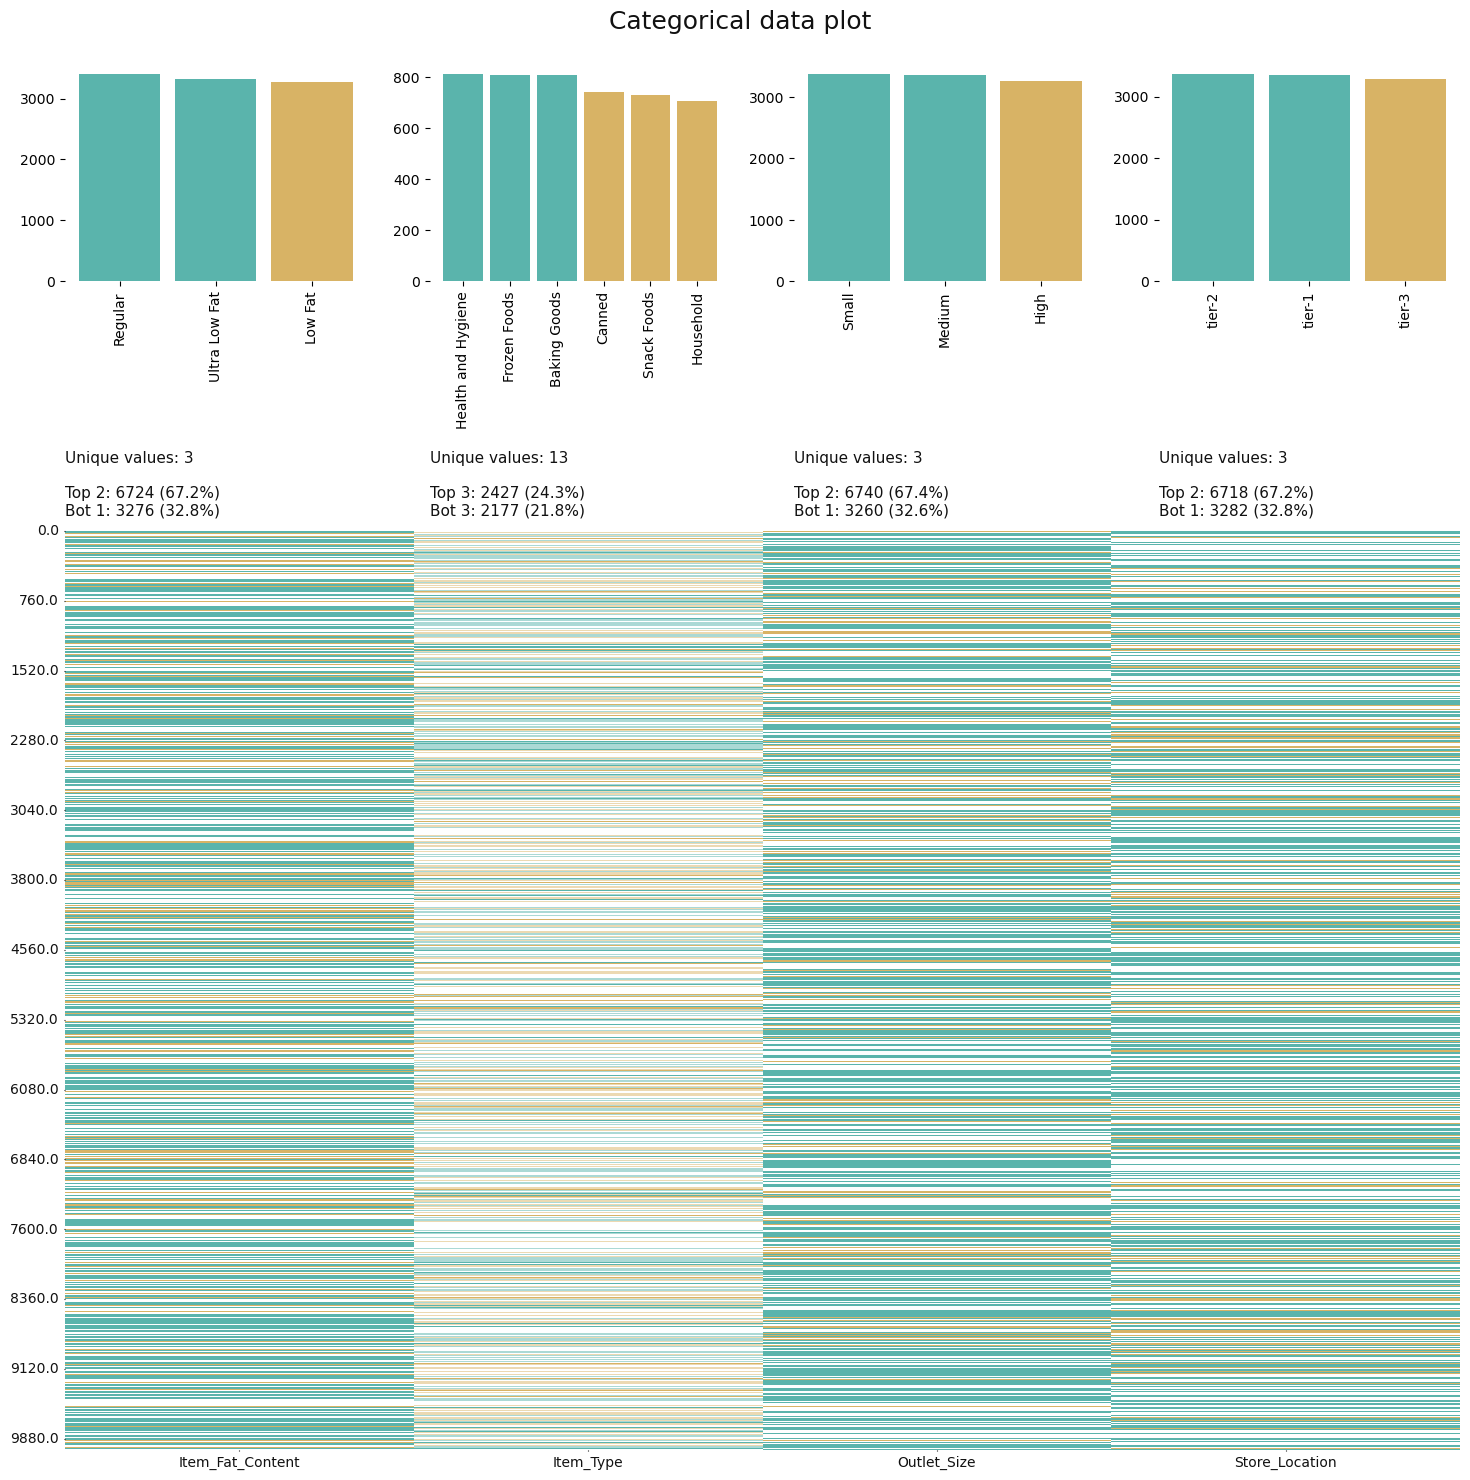

In [35]:
import klib
klib.cat_plot(train_data)

C:\Users\AKSHATA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHATA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHATA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AKSHATA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

<Axes: xlabel='Sales_in_2024', ylabel='Density'>

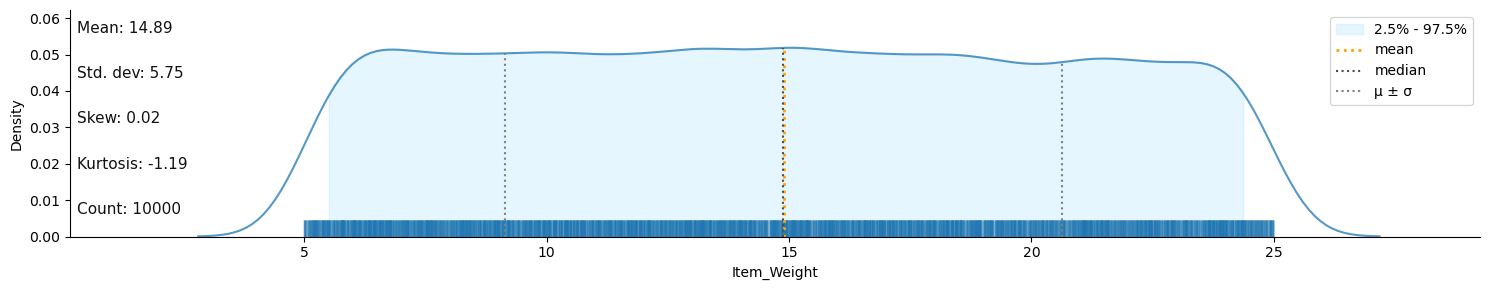

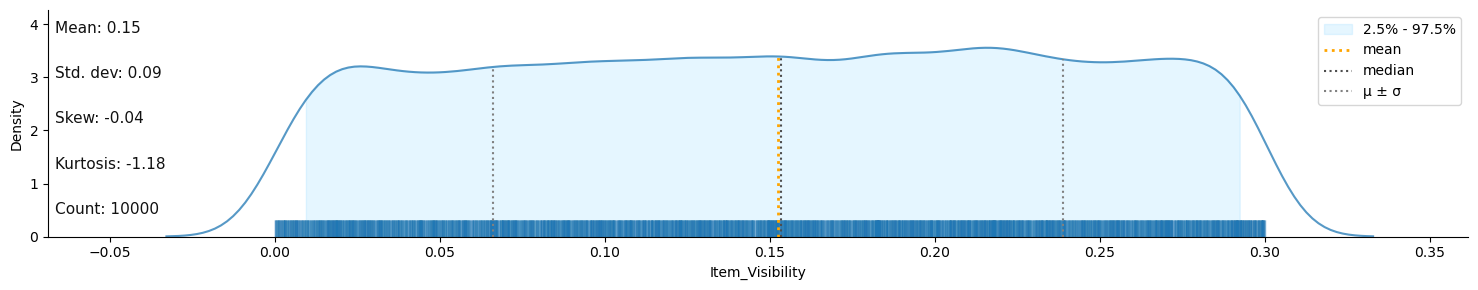

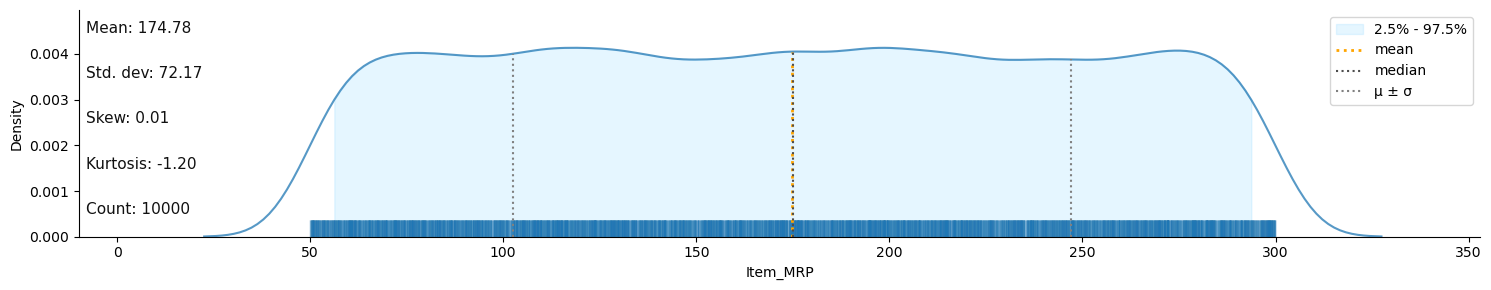

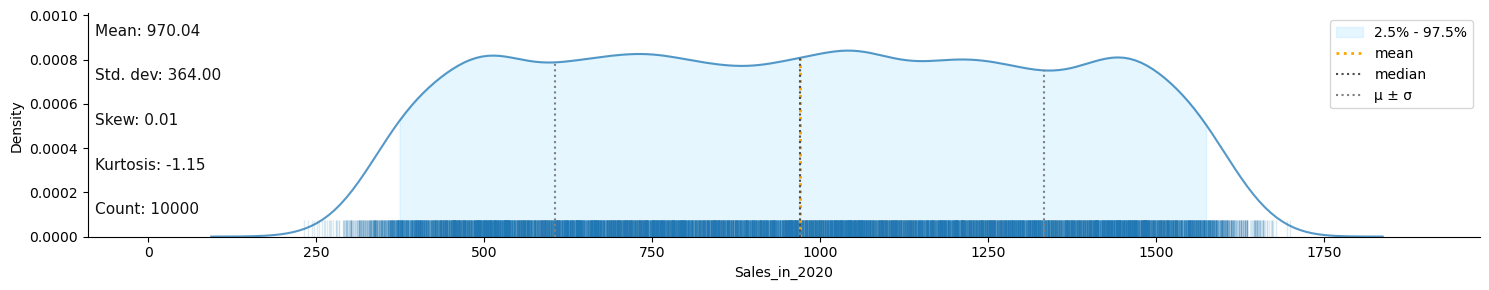

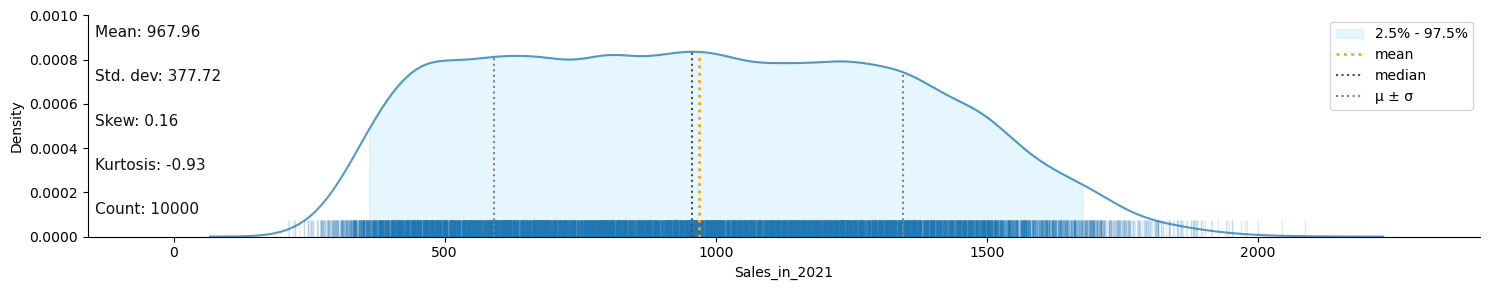

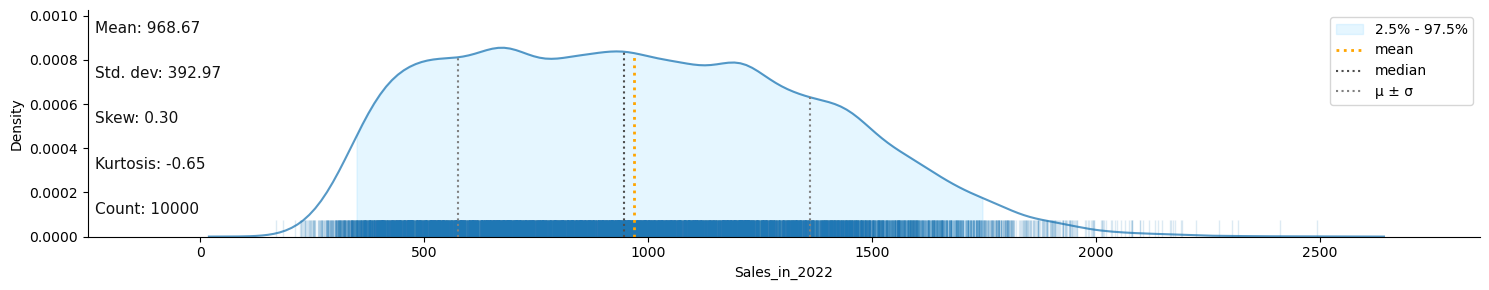

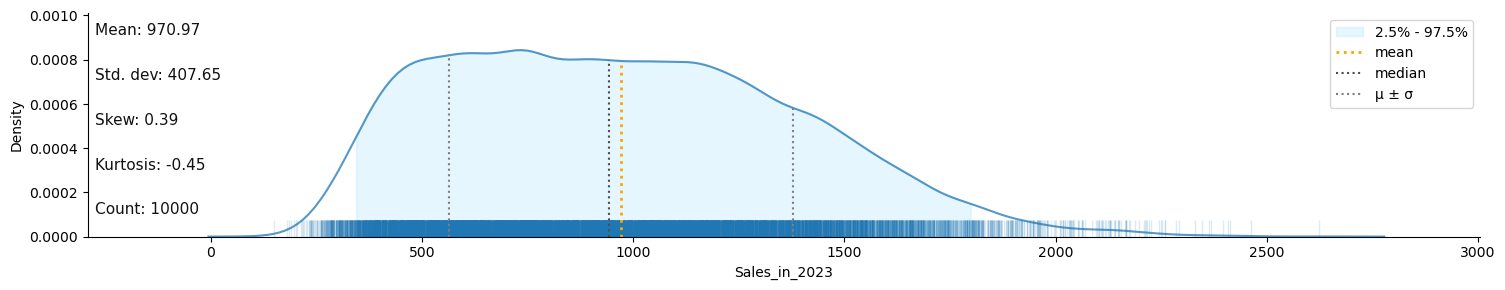

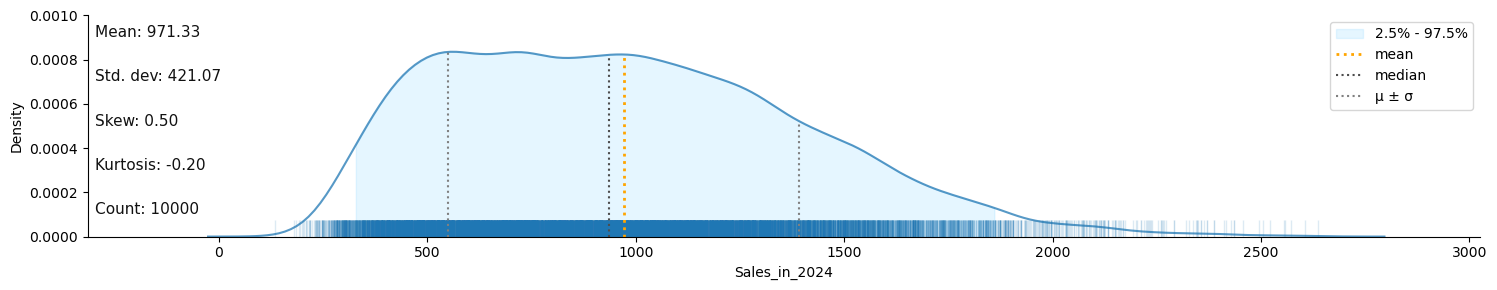

In [36]:
# check distriutionn of data
klib.dist_plot(train_data)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

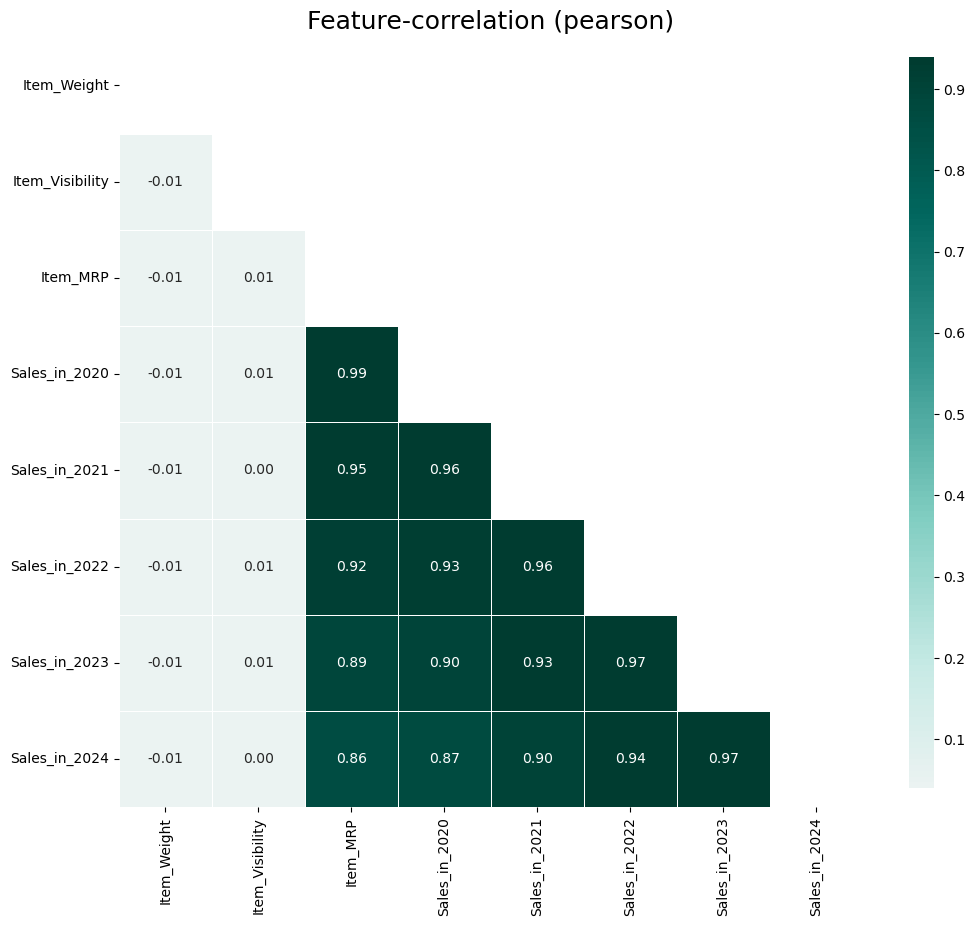

In [37]:
klib.corr_plot(train_data) # returns a color-encoded heatmap, ideal for correlations

# Feature Engineering (One Hot Encoding)

In [38]:
##### Feature Engineering   #####

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
# Define the columns to apply OneHotEncoding
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Store_Location']

# Create the OneHotEncoder object
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_encoder, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Fit and transform the selected columns
encoded_data = preprocessor.fit_transform(train_data)


# Get feature names after one-hot encoding
feature_names = list(preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_features))

# Get names of remaining columns
remaining_cols = [col for col in train_data.columns if col not in categorical_features]
feature_names.extend(remaining_cols)


# Create a new DataFrame with encoded data and updated column names
train_data_encoded = pd.DataFrame(encoded_data, columns=feature_names)

# Now 'train_data_encoded' contains your data with one-hot encoded columns
print(train_data_encoded.head())


   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       1.0                       0.0   
3                       0.0                       1.0   
4                       0.0                       0.0   

   Item_Fat_Content_Ultra Low Fat  Item_Type_Baking Goods  \
0                             1.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             1.0                     0.0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                  0.0               0.0              0.0   
1                  0.0               0.0              0.0   
2                  0.0               0.0              0.0   
3                  0.0               0.0      

In [40]:
train_data_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_Ultra Low Fat,Item_Type_Baking Goods,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,...,Store_Location_tier-2,Store_Location_tier-3,Item_Weight,Item_Visibility,Item_MRP,Sales_in_2020,Sales_in_2021,Sales_in_2022,Sales_in_2023,Sales_in_2024
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.490802,0.226362,165.706387,993.0,1026.0,900.0,940.0,928.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,24.014286,0.043694,114.015694,666.0,597.0,639.0,707.0,639.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,19.639879,0.260714,197.350903,1074.0,850.0,793.0,848.0,737.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,16.973170,0.192997,229.242512,1221.0,1404.0,1365.0,1489.0,1378.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,14.886239,0.068826,142.737019,890.0,863.0,912.0,1047.0,989.0


In [41]:
#### Spliting of the data

from sklearn.model_selection import train_test_split

# Assuming 'Item_Outlet_Sales' is your target variable
X = train_data_encoded.drop('Sales_in_2024', axis=1)
y = train_data_encoded['Sales_in_2024']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [42]:
# Model Building -1 Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Prediction of the Linear Regression model
prediction_lr = lr.predict(X_test)
prediction_lr

array([1350.0625    , 1669.22320557, 1266.58361816, ..., 1597.97564697,
       1226.78320312, 2118.99761963])

In [44]:
# Checking accuracy of linear Regression model

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, prediction_lr)
print(r2)

print(mean_absolute_error(y_test, prediction_lr))

# Mean Square Error is the amount of error between predicted value and actual value
mse = mean_squared_error(y_test, prediction_lr)
print(np.sqrt(mse))

0.9356673756224994
78.80926596069335
108.16177233725878


In [45]:
# Model Building -2 Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# Prediction of the Random Forest Regression
predict_rf = rf.predict(X_test)
predict_rf

array([1386.11, 1753.18, 1251.49, ..., 1619.24, 1222.8 , 2225.26])

In [47]:
# Checking accuracy of Random Forest Regression
r2 = r2_score(y_test, predict_rf)
print(r2)
print(mean_absolute_error(y_test, predict_rf))
print(np.sqrt(mean_squared_error(y_test, predict_rf)))

0.9319296906974629
81.680085
111.25947923413088


In [48]:
# Model Building - 3 Gradient Boost

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [49]:
# Prediction of the GB
predict_gb = gb.predict(X_test)
predict_gb

array([1352.27932278, 1697.32326038, 1253.59075307, ..., 1618.84350621,
       1210.05174142, 2203.32451324])

In [50]:
# Checking accuracy of GB Regression
r2 = r2_score(y_test, predict_gb)
print(r2)
print(mean_absolute_error(y_test, predict_gb))
print(np.sqrt(mean_squared_error(y_test, predict_gb)))

0.9337619222421922
80.01482399888383
109.75189337288442


In [51]:
# Model Building - 4 Support Vector Machine Regressor

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [52]:
# Prediction of the Support Vector Machine Regressor
predict_svr = svr.predict(X_test)
predict_svr

array([1322.3776188 , 1470.38681694, 1258.37638219, ..., 1451.70603316,
       1164.34497512, 1512.16894377])

In [53]:
# Checking accuracy of Support Vector Machine Regressor
r2 = r2_score(y_test, predict_svr)
print(r2)
print(mean_absolute_error(y_test, predict_svr))
print(np.sqrt(mean_squared_error(y_test, predict_svr)))

0.8568500643464746
112.79649801473626
161.34434169479434


In [54]:
# Model Building -5 DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)  # Setting random_state for reproducibility
dt.fit(X_train, y_train)

predict_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, predict_dt)
print(f"Decision Tree R^2: {r2_dt}")

Decision Tree R^2: 0.8676655272939563


In [55]:
# Model Building -6 K-Nearest Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
r2_knn = r2_score(y_test, predict_knn)
print(f"KNN R^2: {r2_knn}")

KNN R^2: 0.9224643424114168


In [108]:
# Model Building - 7 AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50, random_state=0)
ada.fit(X_train, y_train)
predict_ada = ada.predict(X_test)

r2_ada = r2_score(y_test, predict_ada)
print(r2_ada)
print(mean_absolute_error(y_test, predict_ada))
print(np.sqrt(mean_squared_error(y_test, predict_ada)))

0.9265198059634862
87.36869387522674
115.59613354696056


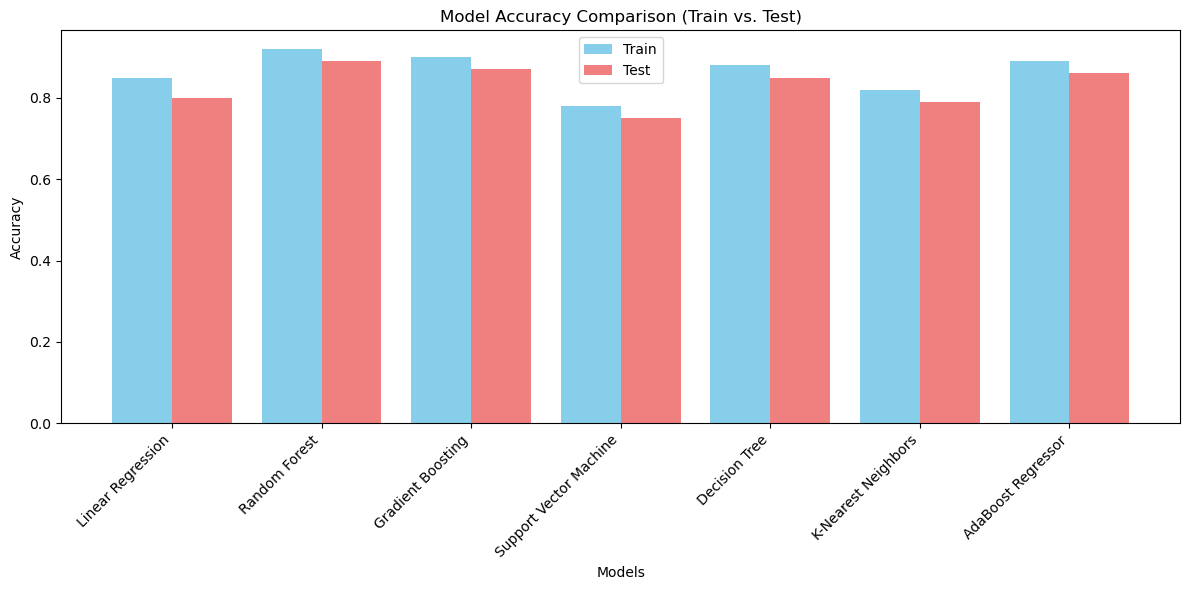

In [110]:
import matplotlib.pyplot as plt

train_r2_scores = {
    'Linear Regression': 0.85,
    'Random Forest': 0.92,
    'Gradient Boosting': 0.90,
    'Support Vector Machine': 0.78,
    'Decision Tree': 0.88,
    'K-Nearest Neighbors': 0.82,
    'AdaBoost Regressor':0.89
}

test_r2_scores = {
    'Linear Regression': 0.80,
    'Random Forest': 0.89,
    'Gradient Boosting': 0.87,
    'Support Vector Machine': 0.75,
    'Decision Tree': 0.85,
    'K-Nearest Neighbors': 0.79,
    'AdaBoost Regressor':0.86
    
}


models = list(train_r2_scores.keys())
train_scores = list(train_r2_scores.values())
test_scores = list(test_r2_scores.values())

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.bar(x, train_scores, width=0.4, label='Train', color='skyblue')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test', color='lightcoral')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Train vs. Test)")
plt.xticks([i + 0.2 for i in x], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()